In [16]:
import pandas as pd
import numpy as np



df = pd.read_csv("hf://datasets/muhrafli/heart-diseases/heart (3).csv")

In [17]:
df.shape

(918, 12)

In [18]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
708,54,M,ASY,110,206,0,LVH,108,Y,0.0,Flat,1
272,55,M,ASY,140,201,0,Normal,130,Y,3.0,Flat,1
623,60,M,ASY,140,293,0,LVH,170,N,1.2,Flat,1
229,37,F,ASY,130,173,0,ST,184,N,0.0,Up,0
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [22]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [25]:
# Manual mapping for categorical columns
mapping_dict = {
    'Sex': {'M': 1, 'F': 0},
    'ChestPainType': {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3},
    'FastingBS': {0: 0, 1: 1},  # Already numeric, but keep for consistency
    'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2},
    'ExerciseAngina': {'N': 0, 'Y': 1},
    'ST_Slope': {'Up': 0, 'Flat': 1, 'Down': 2}
}

# Apply mapping to the dataset
for col, mapping in mapping_dict.items():
    df[col] = df[col].map(mapping)

# Optional: check the result
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              0        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              0        130          283          0           1   
3   48    0              2        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


In [26]:
df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
77   1    2              125        304          0          2           162    1               0.0      0         1               1
28   1    0              130        132          0          2           185    0               0.0      0         0               1
29   1    0              120        243          0          0           160    0               0.0      0         0               1
                         130        204          0          2           202    0               0.0      0         0               1
                         140        263          0          0           170    0               0.0      0         0               1
                                                                                                                                 ..
32   1    2              118        529          0          0           130    0 

In [27]:
df['Cholesterol'].replace(0,np.nan,inplace=True)

C:\Users\Ranjith\AppData\Local\Temp\ipykernel_13948\70607578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].replace(0,np.nan,inplace=True)


In [28]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(df)
df = pd.DataFrame(after_impute, columns = df.columns)

In [29]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,0.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,0.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0,0.0
3,48.0,0.0,2.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,1.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,3.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,2.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,2.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,0.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0,1.0


In [30]:
df['Cholesterol'].isnull().sum()

np.int64(0)

In [31]:
df['RestingBP'].replace(0,np.nan,inplace=True)

C:\Users\Ranjith\AppData\Local\Temp\ipykernel_13948\2933726735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].replace(0,np.nan,inplace=True)


In [32]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(df)
df = pd.DataFrame(after_impute, columns = df.columns)

In [33]:
df['RestingBP'].isna().sum()

np.int64(0)

In [34]:
wop = df.columns
wop = wop.drop('Oldpeak')
df[wop] = df[wop].astype('int32')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


In [36]:
cor = df.corr()['HeartDisease'][:-1].sort_values()

In [37]:
cor

MaxHR            -0.400421
RestingECG        0.061011
Cholesterol       0.101263
RestingBP         0.118333
FastingBS         0.267291
Age               0.282039
Sex               0.305445
Oldpeak           0.403951
ChestPainType     0.459017
ExerciseAngina    0.494282
ST_Slope          0.558771
Name: HeartDisease, dtype: float64

In [38]:
import plotly.express as px

In [39]:
px.line(cor)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak', 'MaxHR']
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG','FastingBS','ExerciseAngina', 'ST_Slope']
target_col = 'HeartDisease'

In [42]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

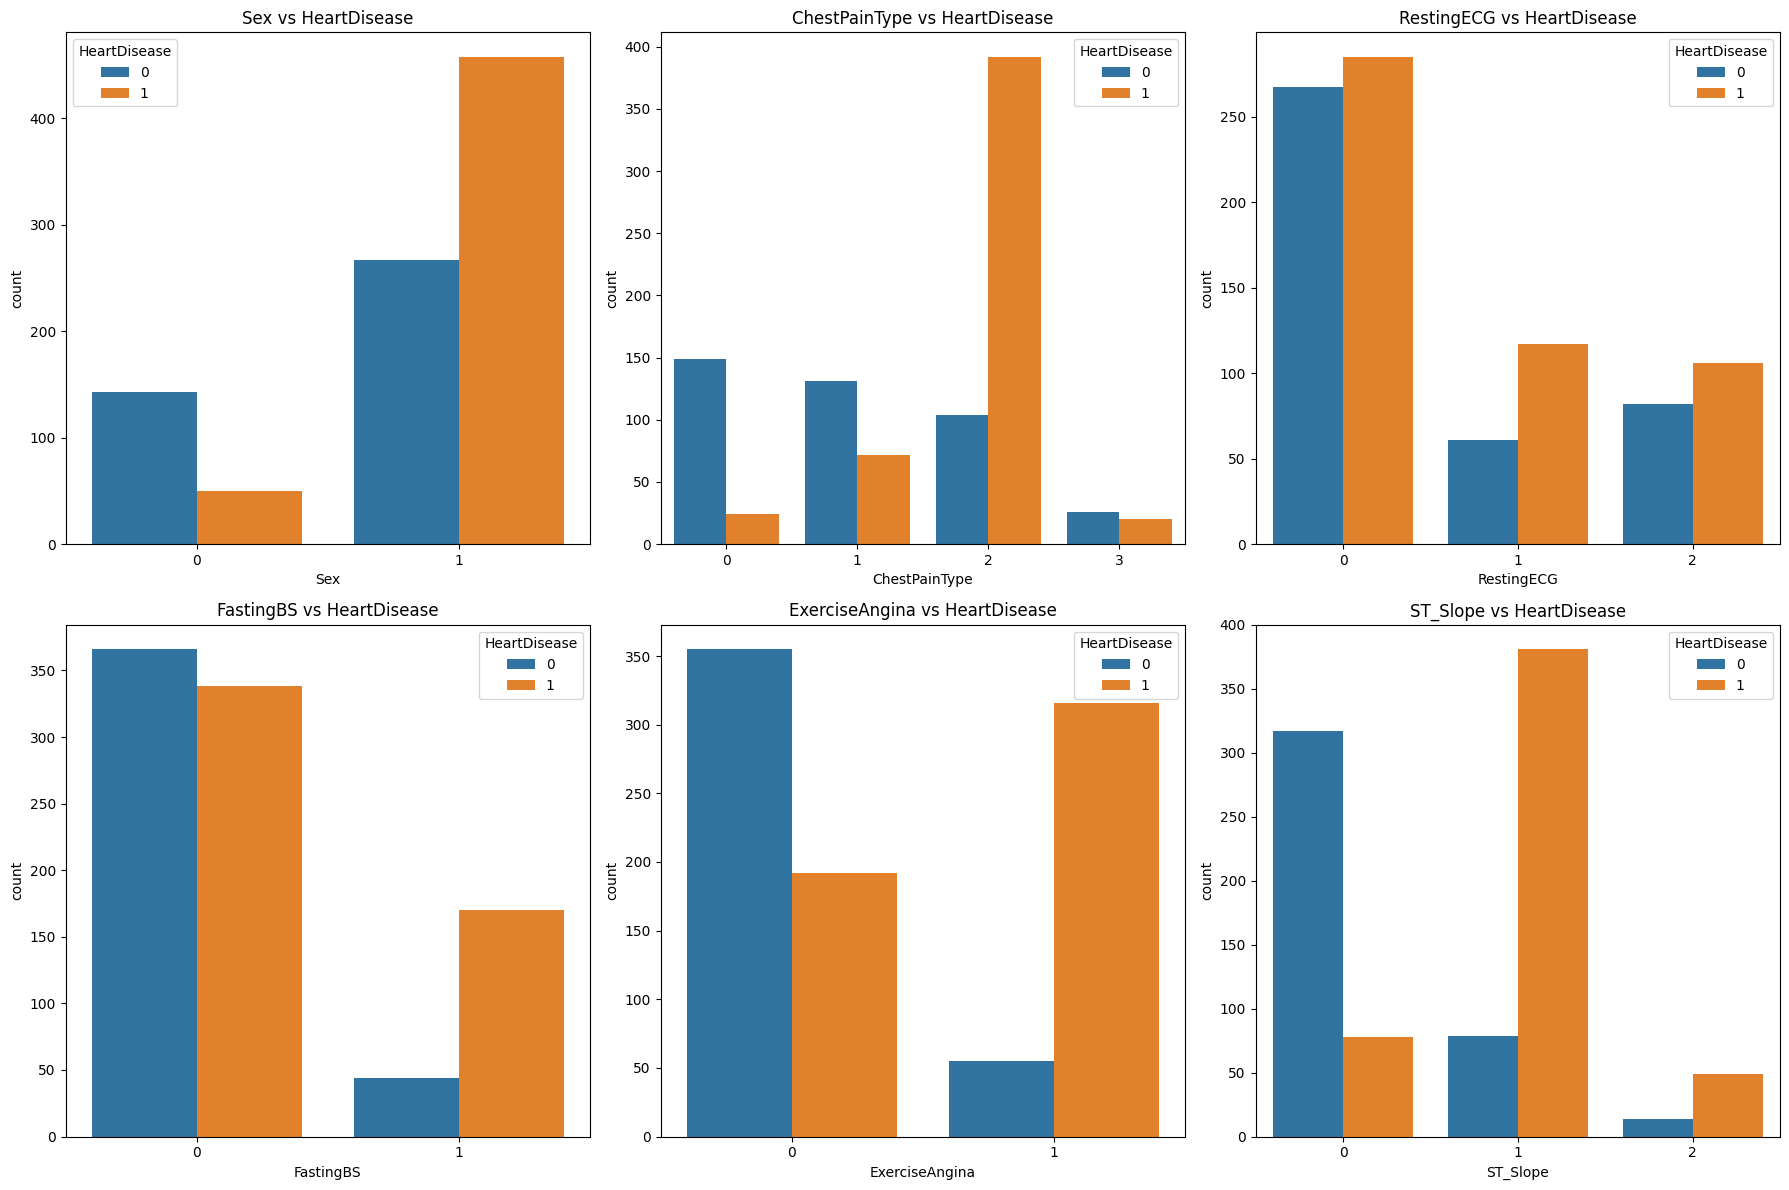

In [43]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()


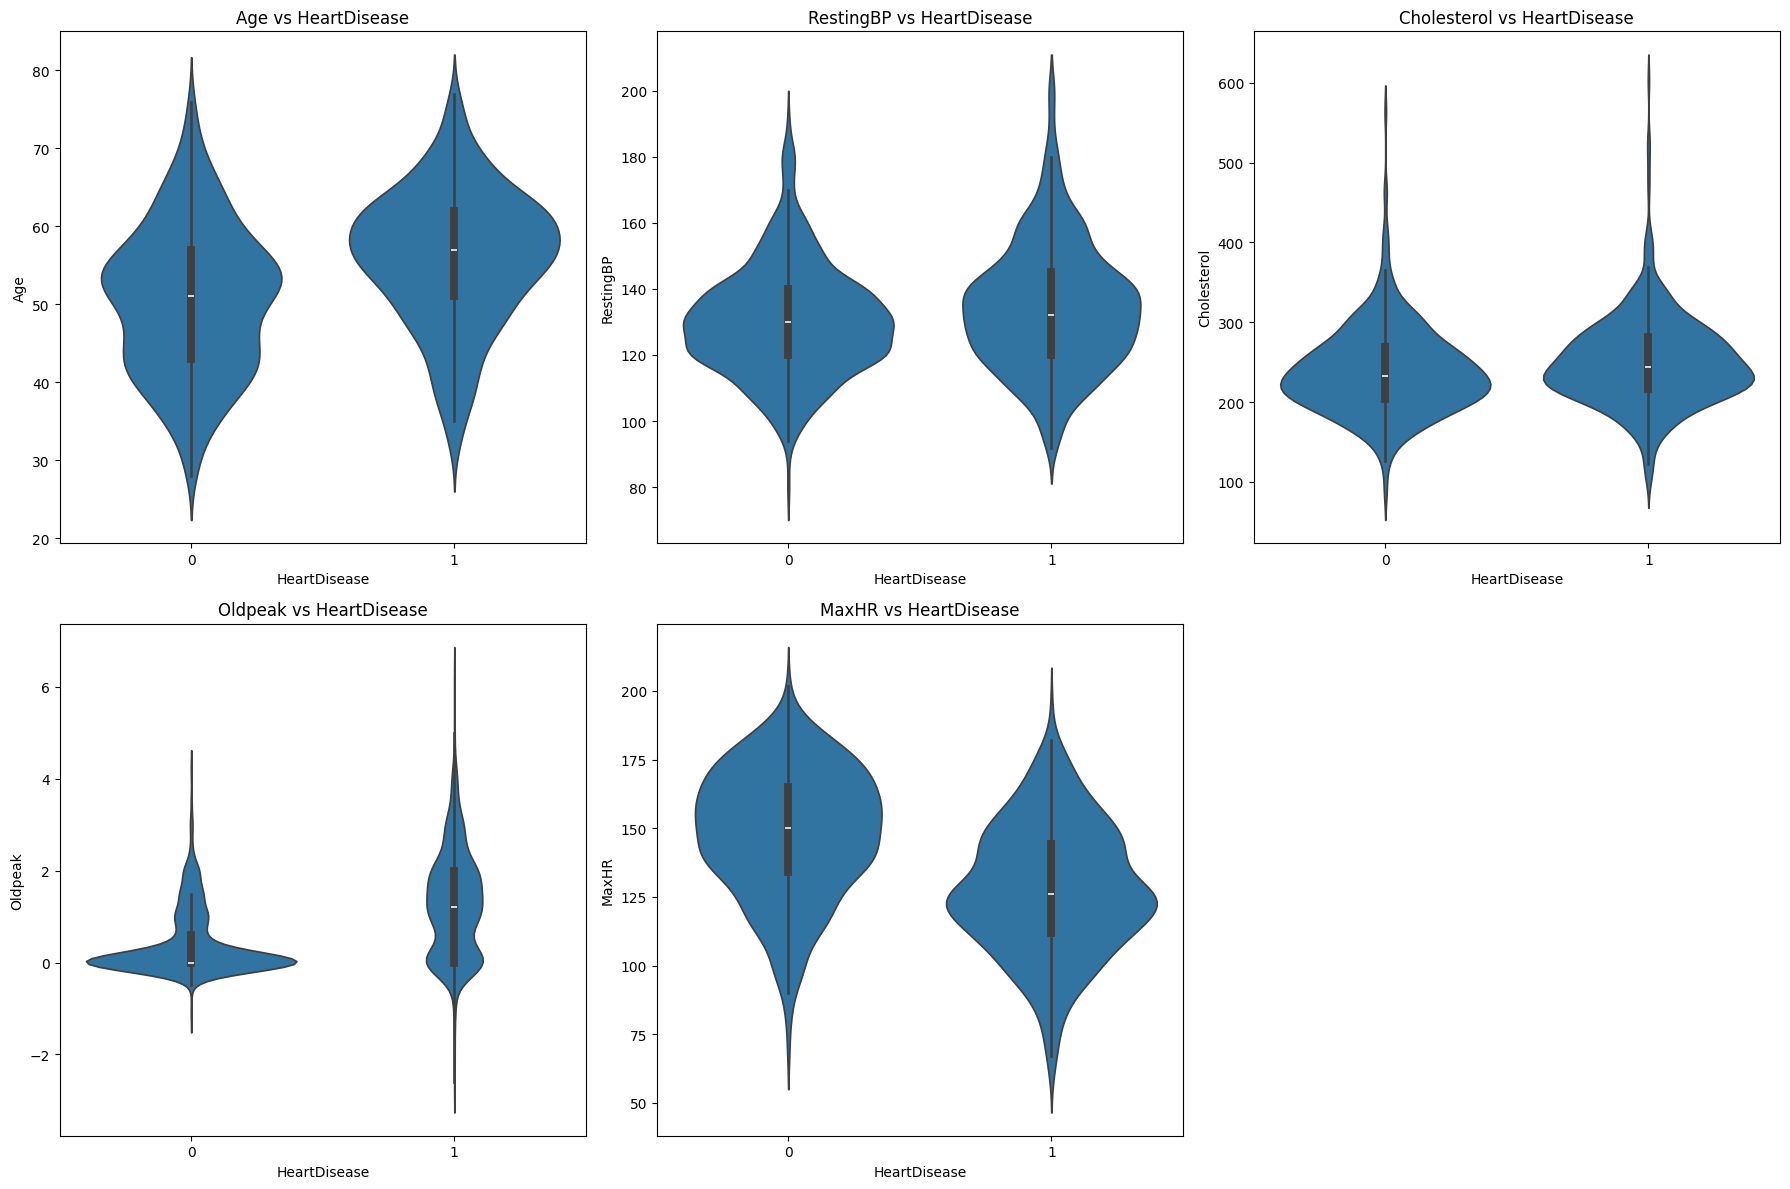

In [44]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs {target_col}")

plt.tight_layout()
plt.show()


In [45]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [46]:
x = df.drop(columns=['HeartDisease'],axis=1)
y = df['HeartDisease']

In [47]:
print(x) 

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              0        140          289          0           0   
1     49    0              1        160          180          0           0   
2     37    1              0        130          283          0           1   
3     48    0              2        138          214          0           0   
4     54    1              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           0   
914   68    1              2        144          193          1           0   
915   57    1              2        130          131          0           0   
916   57    0              0        130          236          0           2   
917   38    1              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [48]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int32


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [50]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler()

# x_train[numeric_cols] = scale.fit_transform(x_train[numeric_cols])
# x_test[numeric_cols] = scale.transform(x_test[numeric_cols])

In [51]:
print(x_train)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
485   63    1              0        139          217          1           1   
486   55    1              0        110          214          1           1   
117   59    0              2        130          338          1           1   
361   47    1              2        160          243          0           0   
296   50    1              2        145          245          1           0   
..   ...  ...            ...        ...          ...        ...         ...   
276   51    1              1        135          160          0           0   
201   46    1              1        120          230          0           0   
462   59    1              2        122          233          0           0   
252   61    1              2        125          292          0           1   
62    45    1              2        140          224          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
485

In [52]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [53]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_solver = ''
test_scores = np.zeros(6)
for i,n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(x_train,y_train)
    test_scores[i] = lr.score(x_test,y_test)
    print(f'{n}: {test_scores[i]}')
    if lr.score(x_test, y_test) == test_scores.max():
        best_solver = n

lr = LogisticRegression(solver = best_solver)
lr.fit(x_train,y_train)
lr_y_pred = lr.predict(x_test)
print(f'accuracy_score :  {accuracy_score(y_test,lr_y_pred)}')

lbfgs: 0.8478260869565217
liblinear: 0.8532608695652174
newton-cg: 0.8586956521739131
newton-cholesky: 0.8586956521739131
sag: 0.7554347826086957
saga: 0.75
accuracy_score :  0.8586956521739131


c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [54]:
lr_y_pred = lr.predict(x_train)
print(f'accuracy_score :  {accuracy_score(y_train,lr_y_pred)}')

accuracy_score :  0.8555858310626703


In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr, x_train, y_train, cv=5)
print("CV scores:", scores)
print("Mean CV score:", np.mean(scores))


CV scores: [0.89795918 0.86394558 0.86394558 0.82312925 0.82191781]
Mean CV score: 0.8541794800111825


In [56]:
from sklearn.metrics import classification_report
y_pred = lr.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.86      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



In [57]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(x_train,y_train)
    y_pred = svm.predict(x_test)
    kernels[i] = f1_score(y_test,y_pred, average = 'weighted')
    if kernels[i] == max(kernels.values()):
        best = i

svm = SVC(kernel=best)
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
print(f'SVM F1_score Kernels({best}): {f1_score(y_test, svm_pred, average="weighted")}')


SVM F1_score Kernels(linear): 0.8422922535440344


In [58]:
svm_pred = svm.predict(x_train)
print(f'SVM F1_score Kernels({best}): {f1_score(y_train, svm_pred, average="weighted")}')

SVM F1_score Kernels(linear): 0.8508459738966995


In [59]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0, 42]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train,y_train)
ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
ctree.fit(x_train,y_train)
dtc_pred = ctree.predict(x_test)
print('Decision Tree Accuracy: ', accuracy_score(y_test,dtc_pred))

Decision Tree Accuracy:  0.8097826086956522


In [60]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators' : [50,100,150,500],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth' : [3,6,9,19],
    'max_leaf_nodes' : [3, 6, 9]
}

grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(x_train,y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(x_train,y_train)
rfc_pred = rfctree.predict(x_test)
print('RandomForest Accuracy: ', accuracy_score(y_test,rfc_pred))

RandomForest Accuracy:  0.8369565217391305


In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

xgb_clf = XGBClassifier(
    n_estimators=200,      # number of trees
    max_depth=4,           # tree depth
    learning_rate=0.1,     # step size shrinkage
    subsample=0.8,         # use 80% samples per tree
    colsample_bytree=0.8,  # use 80% features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 4. Train
xgb_clf.fit(x_train, y_train)

# 5. Predictions
y_pred = xgb_clf.predict(x_test)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8641304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        82
           1       0.90      0.85      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184


Confusion Matrix:
 [[72 10]
 [15 87]]


c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [74]:
input_data = [
    49,     # Age
    1,
    2,            # Sex: Female
    135,    # RestingBP
    248,    # Cholesterol
    1,      # FastingBS         48    0              0        138          214          0           1  108               1      1.5         1 
    1,      # RestingECG: Normal  
    180,    # MaxHR
    1,      # ExerciseAngina: No
    0.0,
    2     # Oldpeak
]


In [75]:
import numpy as np
arr_reshaped = np.asarray(input_data).reshape(1,-1)

# cont_val = arr_reshaped[:,[0,2,3,6,8]]
# categ_val = arr_reshaped[:,[1,4,5,7]]

# scaled = scale.transform(cont_val)

# final_input = np.concatenate([scaled[:, [0]],   
#                               categ_val[:, [0]],     
#                               scaled[:, [1]],     
#                               scaled[:, [2]],     
#                               categ_val[:, [1]],     
#                               categ_val[:, [2]],     
#                               scaled[:, [3]],   
#                               categ_val[:, [3]],   
#                               scaled[:, [4]]],    
#                              axis=1)


# print(final_input)

In [76]:
pred = rfctree.predict(arr_reshaped)

if pred[0] == 0:
    print("No Disease")
else:
    print("Disease")

Disease


c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [77]:
pred = lr.predict(arr_reshaped)

if pred[0] == 0:
    print("No Disease")
else:
    print("Disease")

Disease


c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [78]:
pred = ctree.predict(arr_reshaped)

if pred[0] == 0:
    print("No Disease")
else:
    print("Disease")

Disease


c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [79]:
pred = svm.predict(arr_reshaped)

if pred[0] == 0:
    print("No Disease")
else:
    print("Disease")

Disease


c:\Users\Ranjith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [86]:
import pickle
file = open('model_ctree.pkl','wb')
pickle.dump(ctree,file)